<a href="https://colab.research.google.com/github/Ke-Pa-Sa/ProjectML_phase_detection/blob/main/ProjectML_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting phase transitions using Self Supervised Learning

In [226]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, random_split, DataLoader

In [227]:
filename = "spins_data_L64_modelIsing_N10_nT101_minT0.8_maxT3.8_1.csv"

file_path = "C:/Users/kelvi/Documents/VCS_python/" + filename

df = pd.read_csv(file_path)
print(df['Temperature'])

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 1010, dtype: float64


In [118]:
file_path = "spins_data_L64_modelIsing_N10_nT101_minT0.8_maxT3.8_1.csv"

df = pd.read_csv(file_path)
print(df['Temperature'])

FileNotFoundError: [Errno 2] No such file or directory: 'spins_data_L64_modelIsing_N10_nT101_minT0.8_maxT3.8_1.csv'

In [180]:
filename_t = "spins_data_L64_modelIsing_N30_nT61_minT1.5_maxT3.5_1.csv"

file_path_t = "C:/Users/kelvi/Documents/VCS_python/" + filename_t

df_t = pd.read_csv(file_path_t)

print(df_t['Temperature'])

0       1.5
1       1.5
2       1.5
3       1.5
4       1.5
       ... 
1825    3.5
1826    3.5
1827    3.5
1828    3.5
1829    3.5
Name: Temperature, Length: 1830, dtype: float64


In [4]:
file_path_t = "spins_data_L64_modelIsing_N30_nT61_minT1.5_maxT3.5_1.csv"

df_t = pd.read_csv(file_path_t)

print(df_t['Temperature'])

0       1.5
1       1.5
2       1.5
3       1.5
4       1.5
       ... 
1825    3.5
1826    3.5
1827    3.5
1828    3.5
1829    3.5
Name: Temperature, Length: 1830, dtype: float64


In [181]:
# Regular expression pattern to match the parts of the filename
# The (?P<extra>\d+)? part makes the extra digits optional
pattern = r"spins_data_L(?P<L>\d+)_model(?P<model>\w+)_N(?P<N>\d+)_nT(?P<nT>\d+)"

# Search for the pattern in the filename
match = re.search(pattern, file_path)

match_t = re.search(pattern, file_path_t)

# Extract the values if the pattern was found
if match:
    L = int(match.group('L'))
    model = match.group('model')
    N = int(match.group('N'))
    nT = int(match.group('nT'))
    print(f"L: {L}, model: {model}, N: {N}, nT: {nT}")
else:
    print("Pattern not found in the filename.")

if match_t:
    L_t = int(match_t.group('L'))
    model_t = match_t.group('model')
    N_t = int(match_t.group('N'))
    nT_t = int(match_t.group('nT'))
    print(f"L_t: {L_t}, model_t: {model_t}, N_t: {N_t}, nT_t: {nT_t}")
else:
    print("Pattern not found in the filename.")


L: 64, model: Ising, N: 10, nT: 101
L_t: 64, model_t: Ising, N_t: 30, nT_t: 61


In [182]:
df['Spins'] = df['Spins'].apply(lambda x: np.reshape(list(map(float, x.split(' '))), (L,L)))
df_t['Spins'] = df_t['Spins'].apply(lambda x: np.reshape(list(map(float, x.split(' '))), (L,L)))


In [183]:
print(df['Spins'])
print(df_t['Spins'])

0       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
1       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
2       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
4       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
                              ...                        
1005    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0...
1006    [[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0,...
1007    [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0...
1008    [[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -...
1009    [[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0,...
Name: Spins, Length: 1010, dtype: object
0       [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
1       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
2       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
3       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1....
4       [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...
                              .

In [7]:
fig, axes = plt.subplots(nT, N, figsize=(int(N*5), int(nT*5)))



for i, spin in enumerate(df['Spins']):
    # Convert the spins string back to a list of integers
    #spin_list = list(map(float, spin.split(' ')))

    #df.loc[i, "Spins_float"] = spin_list
    #print(spin.shape)
    # Reshape the spins list into a LxL grid
    spin_config = np.reshape(spin, (L, L))

    axes[i//N,i%N].imshow(spin_config, cmap='coolwarm', interpolation='nearest')
    T = df["Temperature"][i]
    axes[i//N,i%N].set_title(f"Temperature {T}")
    axes[i//N,i%N].axis('off') # Optionally, hide the axis


Error in callback <function flush_figures at 0x000001E89F782520> (for post_execute):


KeyboardInterrupt: 

In [9]:
fig, axes = plt.subplots(nT_t, N_t, figsize=(int(N_t*5), int(nT_t*5)))



for i, spin in enumerate(df_t['Spins']):
    # Convert the spins string back to a list of integers
    #spin_list = list(map(float, spin.split(' ')))

    #df.loc[i, "Spins_float"] = spin_list
    #print(spin.shape)
    # Reshape the spins list into a LxL grid
    spin_config = np.reshape(spin, (L_t, L_t))

    axes[i//N_t,i%N_t].imshow(spin_config, cmap='coolwarm', interpolation='nearest')
    T = df_t["Temperature"][i]
    axes[i//N_t,i%N_t].set_title(f"Temperature {T}")
    axes[i//N_t,i%N_t].axis('off') # Optionally, hide the axis


In [184]:
torch.manual_seed(42)
x= 2.1
#print(df['Temperature'])
filtered_df = df[((df['Temperature'] > x-1.1) & (df['Temperature'] < x-0.3)) | ((df['Temperature'] > x+0.3) & (df['Temperature'] < x+1.1))]
print(filtered_df["Temperature"])

X = torch.tensor(filtered_df['Temperature'].values, dtype=torch.float)
y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in filtered_df['Spins'].values]).unsqueeze(1)
dataset = TensorDataset(X, y)

X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
dataset_t = TensorDataset(X_t, y_t)

70     1.01
71     1.01
72     1.01
73     1.01
74     1.01
       ... 
795    3.17
796    3.17
797    3.17
798    3.17
799    3.17
Name: Temperature, Length: 530, dtype: float64


In [185]:
train_ratio = 0.8 # 80% for training, 20% for testing

# Calculate the number of samples for training and testing
num_samples = len(dataset)
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train

print(num_train, num_test)

# Split the dataset
torch.manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

424 106


In [186]:
print(dataset[3][1].shape)
# channel, dimentions

torch.Size([1, 64, 64])


In [187]:
print(len(train_dataset), len(test_dataset))

424 106


In [223]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary



In [224]:
# PyTorch models inherit from torch.nn.Module
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(4, 16, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Flatten(),
            nn.Linear(64*4*4, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16,1)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x

# PyTorch models inherit from torch.nn.Module
class NN_1(nn.Module):
    def __init__(self):
        super(NN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(L**2, 16000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 2000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2000, 1000),
            nn.ReLU(),
            nn.Linear(1000,200),
            nn.Dropout(0.5),
            nn.Linear(200, 20),
            nn.ReLU(),
            nn.Linear(20,1)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x


In [225]:
model = CNN_1()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

#torch.optim.Adam(model.parameters(), lr=0.01)
#optim.SGD(model.parameters(), lr=0.005, momentum=0.9, dampening=0.0, weight_decay=0.0, nesterov=True)
#optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)
#epoch 100
#summary(model, input_size=(1, L, L))
summary(model, input_size=(1, L, L))
#print(train_dataset[5])
batch_size = 8 # Example batch size
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
#print(trainloader[0][1].shape)
for batch_idx, (temperatures, spin_configs) in enumerate(trainloader):
    print(f"Batch {batch_idx}:")
    print(f"Temperatures shape: {temperatures.shape}")
    print(f"Spin Configurations shape: {spin_configs.shape}")
    break

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 64, 64]              40
              ReLU-2            [-1, 4, 64, 64]               0
         MaxPool2d-3            [-1, 4, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]             592
              ReLU-5           [-1, 16, 32, 32]               0
         MaxPool2d-6           [-1, 16, 16, 16]               0
            Conv2d-7           [-1, 32, 16, 16]           4,640
              ReLU-8           [-1, 32, 16, 16]               0
         MaxPool2d-9             [-1, 32, 8, 8]               0
           Conv2d-10             [-1, 64, 8, 8]          18,496
             ReLU-11             [-1, 64, 8, 8]               0
        MaxPool2d-12             [-1, 64, 4, 4]               0
          Flatten-13                 [-1, 1024]               0
           Linear-14                  [

tensor(0.0105, grad_fn=<MeanBackward0>)
tensor(0.0032, grad_fn=<MeanBackward0>)
tensor(0.0158, grad_fn=<MeanBackward0>)
tensor(0.0037, grad_fn=<MeanBackward0>)
tensor(0.0038, grad_fn=<MeanBackward0>)
tensor(0.0231, grad_fn=<MeanBackward0>)
tensor(0.0266, grad_fn=<MeanBackward0>)
tensor(0.0127, grad_fn=<MeanBackward0>)
tensor(0.0044, grad_fn=<MeanBackward0>)
tensor(0.0152, grad_fn=<MeanBackward0>)
tensor(0.0123, grad_fn=<MeanBackward0>)
tensor(0.0176, grad_fn=<MeanBackward0>)
tensor(0.0086, grad_fn=<MeanBackward0>)
tensor(0.0093, grad_fn=<MeanBackward0>)
tensor(0.0102, grad_fn=<MeanBackward0>)
tensor(0.0058, grad_fn=<MeanBackward0>)
tensor(0.0056, grad_fn=<MeanBackward0>)
tensor(0.0138, grad_fn=<MeanBackward0>)
tensor(0.0102, grad_fn=<MeanBackward0>)
tensor(0.0092, grad_fn=<MeanBackward0>)
tensor(0.0072, grad_fn=<MeanBackward0>)
tensor(0.0111, grad_fn=<MeanBackward0>)
tensor(0.0056, grad_fn=<MeanBackward0>)
tensor(0.0060, grad_fn=<MeanBackward0>)
tensor(0.0078, grad_fn=<MeanBackward0>)


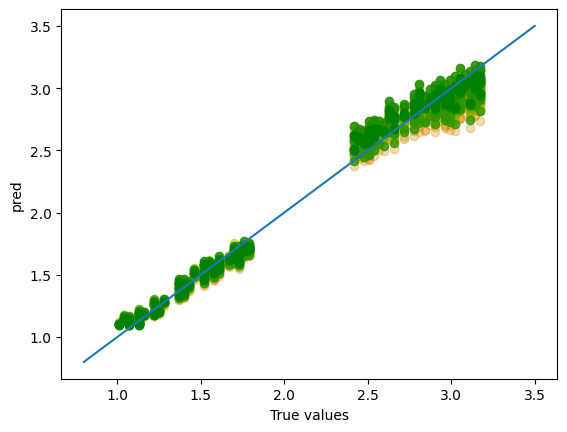

In [220]:
#torch.manual_seed(42)
n_epochs = 20

y_pred_list = []
labels_list = []

fig, ax = plt.subplots()
ax.plot(np.linspace(0.8,3.5,1001),np.linspace(0.8,3.5,1001))
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),n_epochs))
#print(n_epochs//10)

for epoch in range(n_epochs):
    for labels, inputs in trainloader:
        # forward, backward, and then weight update
        #print(inputs.shape)
        #print(labels.shape)
        y_pred = model(inputs)
        loss = loss_fn(y_pred.squeeze(), labels)
        #print(loss)
        print(torch.mean((y_pred.squeeze() - labels)**2))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #if epoch%10 == 0:
    #print(epoch)
    mse = 0
    count = 0
    for labels, inputs in testloader:
        y_pred = model(inputs)
        mse += torch.mean((y_pred.squeeze() - labels)**2)
        count += len(labels)
        y_pred_list.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list.extend(labels.tolist()) # Convert to list and add to labels_list

    mse /= count
    print("Epoch %d: model mean square error %.10f" % (epoch, mse))

    ax.scatter(labels_list, y_pred_list, alpha = epoch/n_epochs, c=str(colors[int(epoch)]))
    ax.set_xlabel('True values')
    ax.set_ylabel('pred')
    y_pred_list.clear()
    labels_list.clear()


In [193]:
#torch.manual_seed(42)
testloader_t = DataLoader(dataset_t, batch_size=N_t, shuffle=False)

y_pred_list_t = []
labels_list_t = []
mse_t = []
std_t = []
count_t = 0
for labels, inputs in testloader_t:
        y_pred = model(inputs)
        print(labels, y_pred.squeeze())
        #print(torch.mean((y_pred.squeeze() - labels)**2).item())
        mse_t.append(torch.mean((y_pred.squeeze() - labels)**2).item())
        std_t.append(torch.std(y_pred.squeeze()).item())
        count += len(labels)
        y_pred_list_t.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list_t.extend(labels.tolist()) # Convert to list and add to labels_list
print(mse_t)
print(std_t)
print(y_pred_list_t)
print(labels_list_t)


tensor([1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
        1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
        1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000, 1.5000,
        1.5000, 1.5000, 1.5000]) tensor([1.6061, 1.5723, 1.5523, 1.6329, 1.5943, 1.3486, 1.5407, 1.5820, 1.5939,
        1.4987, 1.5960, 1.5413, 1.5570, 1.5915, 1.4750, 1.5143, 1.5443, 1.4973,
        1.5925, 1.5372, 1.5800, 1.5663, 1.5813, 1.5634, 1.5745, 1.6266, 1.5043,
        1.5798, 1.5317, 1.5635], grad_fn=<SqueezeBackward0>)
tensor([1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333,
        1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333,
        1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333, 1.5333,
        1.5333, 1.5333, 1.5333]) tensor([1.4817, 1.5738, 1.6130, 1.4722, 1.6235, 1.5267, 1.4368, 1.5505, 1.6617,
        1.6122, 1.5196, 1.6200, 1.5046, 1.5711, 1.5444, 1.5568, 1.6074, 1

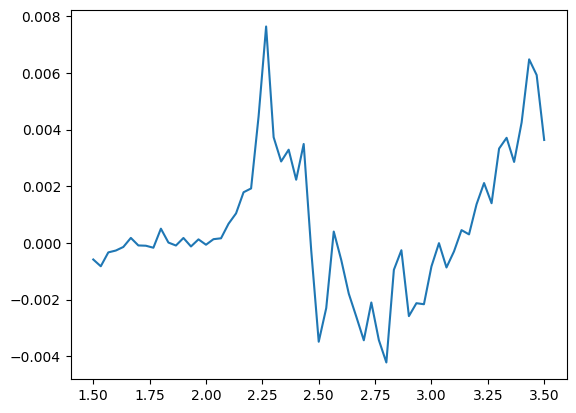

In [194]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, np.gradient(mse_t, 2))

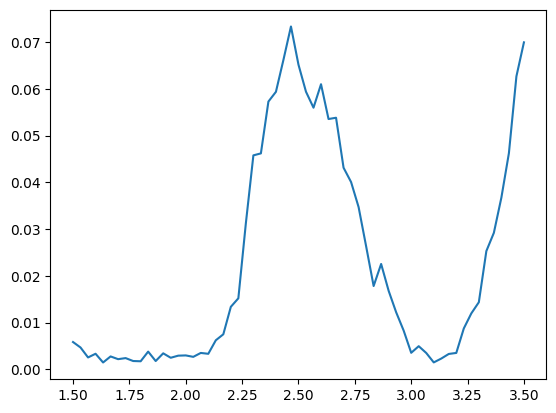

In [195]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, mse_t)

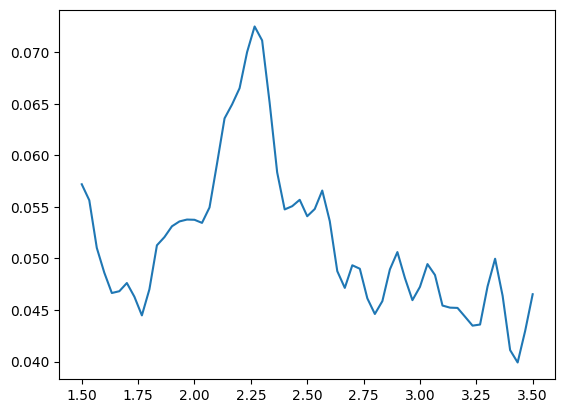

In [196]:
from scipy.ndimage import gaussian_filter

fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, gaussian_filter(std_t, 1))

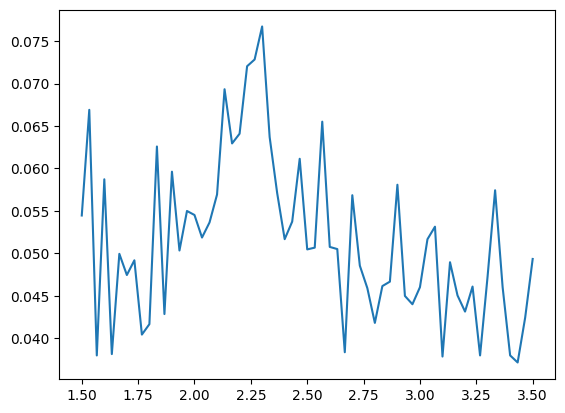

In [197]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, std_t)

In [198]:
x=1.5
y=3.1
print(df['Temperature'])
filtered_df = df[(df['Temperature'] < x) | (df['Temperature'] > y)]
print(filtered_df["Temperature"])

0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 1010, dtype: float64
0       0.8
1       0.8
2       0.8
3       0.8
4       0.8
       ... 
1005    3.8
1006    3.8
1007    3.8
1008    3.8
1009    3.8
Name: Temperature, Length: 480, dtype: float64


In [ ]:
# background std 
X = torch.tensor(df['Temperature'].values, dtype=torch.float)
y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df['Spins'].values]).unsqueeze(1)
dataset = TensorDataset(X, y)

X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
dataset_t = TensorDataset(X_t, y_t)

train_ratio = 0.8 # Just use 100% for training

# Calculate the number of samples for training and testing
num_samples = len(dataset)
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train

train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

model = CNN_1()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

n_epochs = 10

for epoch in range(n_epochs):
    for labels, inputs in trainloader:
        # forward, backward, and then weight update
        y_pred = model(inputs)
        loss = loss_fn(y_pred.squeeze(), labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

testloader_t = DataLoader(dataset_t, batch_size=N_t, shuffle=False)

y_pred_list_t = []
labels_list_t = []
mse_t = []
std_background = []
count_t = 0
for labels, inputs in testloader_t:
        y_pred = model(inputs)
        #print(labels, y_pred.squeeze())
        #print(torch.mean((y_pred.squeeze() - labels)**2).item())
        mse_t.append(torch.mean((y_pred.squeeze() - labels)**2).item())
        std_background.append(torch.std(y_pred.squeeze()).item())
        count_t += len(labels)
        y_pred_list_t.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list_t.extend(labels.tolist()) # Convert to list and add to labels_list
#print(mse_t)
#print(std_t)
#print(y_pred_list_t)
#print(labels_list_t)
#td_background


In [ ]:
print(std_background)

[0.05251847580075264, 0.06566813588142395, 0.042282041162252426, 0.06153802573680878, 0.04214272275567055, 0.051962174475193024, 0.04997307062149048, 0.05467952415347099, 0.04646455496549606, 0.046285323798656464, 0.06262943893671036, 0.054443806409835815, 0.058558013290166855, 0.04975522682070732, 0.05730109289288521, 0.05806569382548332, 0.049866363406181335, 0.055943913757801056, 0.05575411766767502, 0.06840560585260391, 0.061985209584236145, 0.062227074056863785, 0.06576670706272125, 0.08372857421636581, 0.08104530721902847, 0.09000781923532486, 0.08136715739965439, 0.06225655972957611, 0.06716067343950272, 0.09469278901815414, 0.07454206794500351, 0.0666750967502594, 0.08411352336406708, 0.08530916273593903, 0.06971663981676102, 0.07067707926034927, 0.0758710727095604, 0.05487753078341484, 0.06818675249814987, 0.07078801095485687, 0.07309919595718384, 0.05357874929904938, 0.08929698169231415, 0.07214616984128952, 0.0743078887462616, 0.07108002156019211, 0.08923985809087753, 0.0823

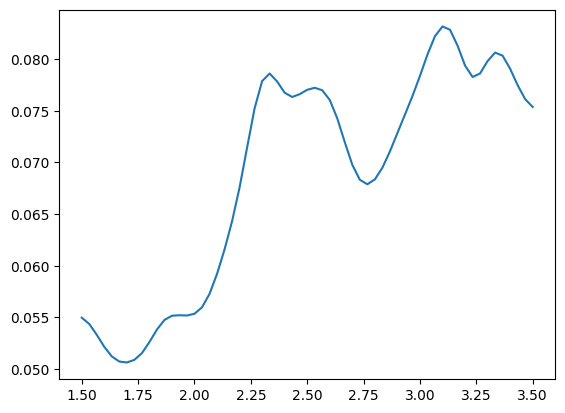

In [199]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, gaussian_filter(std_background,2))

In [200]:
def get_std(lo_mid, hi_mid, inter_length, df = df, batch_size = batch_size, n_epochs = n_epochs):
    #torch.manual_seed(42)
    #x= 2.4
    #The parameters we'd pass to replicate the behaviour above would be:
    #lo_mid = 1.7, hi_mid = 3.1, inter_length = 0.8
    filtered_df = df[((df['Temperature'] > lo_mid-inter_length/2) & (df['Temperature'] < lo_mid+inter_length/2)) | ((df['Temperature'] > hi_mid-inter_length/2) & (df['Temperature'] < hi_mid+inter_length/2))]
    #print(filtered_df["Temperature"])

    X = torch.tensor(filtered_df['Temperature'].values, dtype=torch.float)
    y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in filtered_df['Spins'].values]).unsqueeze(1)
    dataset = TensorDataset(X, y)

    X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
    y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
    dataset_t = TensorDataset(X_t, y_t)

    train_ratio = 0.8 # Just use 100% for training

    # Calculate the number of samples for training and testing
    num_samples = len(dataset)
    num_train = int(train_ratio * num_samples)
    num_test = num_samples - num_train

    #print(num_train, num_test)

    # Split the dataset
    #torch.manual_seed(42)
    train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

    model = CNN_1()
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

    #torch.optim.Adam(model.parameters(), lr=0.01)
    #optim.SGD(model.parameters(), lr=0.005, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)
    #epoch 100
    #summary(model, input_size=(1, L, L))

    #print(train_dataset[5])
    #batch_size = 8 # Example batch size
    trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    #n_epochs = 100

    for epoch in range(n_epochs):
        for labels, inputs in trainloader:
            # forward, backward, and then weight update
            y_pred = model(inputs)
            loss = loss_fn(y_pred.squeeze(), labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    testloader_t = DataLoader(dataset_t, batch_size=N_t, shuffle=False)

    y_pred_list_t = []
    labels_list_t = []
    mse_t = []
    std_t = []
    count_t = 0
    for labels, inputs in testloader_t:
            y_pred = model(inputs)
            #print(labels, y_pred.squeeze())
            #print(torch.mean((y_pred.squeeze() - labels)**2).item())
            mse_t.append(torch.mean((y_pred.squeeze() - labels)**2).item())
            std_t.append(torch.std(y_pred.squeeze()).item())
            count_t += len(labels)
            y_pred_list_t.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
            labels_list_t.extend(labels.tolist()) # Convert to list and add to labels_list
    #print(mse_t)
    #print(std_t)
    #print(y_pred_list_t)
    #print(labels_list_t)
    return std_t

In [201]:
test_std = get_std(1.7, 3.1, 0.8, n_epochs = 20)

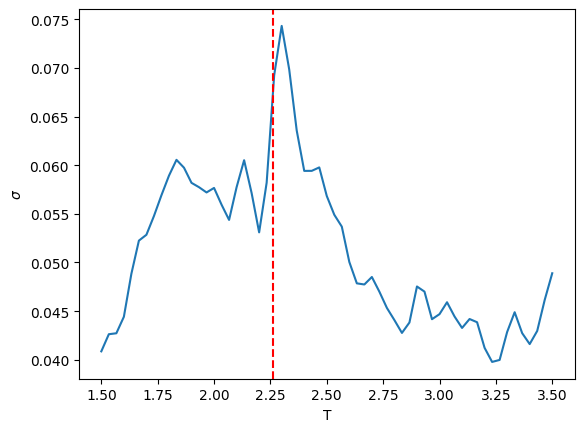

In [221]:
fig, ax = plt.subplots()
labels_subset = labels_list_t[::N_t]
ax.plot(labels_subset, gaussian_filter(test_std, 1))
ax.set_xlabel('T')
ax.set_ylabel('$\sigma$')
ax.axvline(x=2.26, color='r', linestyle='--')

In [209]:
idx_range = np.where((np.array(labels_subset) > 1.75) & (np.array(labels_subset) < 2.25))[0]
print(test_std[idx_range[0]:idx_range[-1]])
print(np.max(test_std[idx_range[0]:idx_range[-1]]))

[0.05521827191114426, 0.05875643342733383, 0.06253395974636078, 0.061976153403520584, 0.05280061438679695, 0.06401309370994568, 0.05010513588786125, 0.06316076964139938, 0.057223934680223465, 0.046744368970394135, 0.0597560852766037, 0.06491774320602417, 0.06131785362958908, 0.04218261316418648]
0.06491774320602417


In [211]:
n_plots = 16
n_epochs = 20
tc = 2.26
train_range = 0.8
test_range = 0.6
low_low = tc-(train_range+test_range)/2-test_range/2 
low_hi = tc+(train_range+test_range)/2-test_range/2 


In [212]:
stds = [get_std(low_low+i, low_hi+i, train_range, n_epochs=n_epochs) for i in np.linspace(0, test_range, n_plots)]


[(1.2599999999999998, 2.66, 0.8), (1.2999999999999998, 2.7, 0.8), (1.3399999999999999, 2.74, 0.8), (1.38, 2.7800000000000002, 0.8), (1.4199999999999997, 2.8200000000000003, 0.8), (1.4599999999999997, 2.8600000000000003, 0.8), (1.4999999999999998, 2.9000000000000004, 0.8), (1.5399999999999998, 2.9400000000000004, 0.8), (1.5799999999999998, 2.98, 0.8), (1.6199999999999997, 3.02, 0.8), (1.6599999999999997, 3.06, 0.8), (1.6999999999999997, 3.1, 0.8), (1.7399999999999998, 3.14, 0.8), (1.7799999999999998, 3.18, 0.8), (1.8199999999999998, 3.22, 0.8), (1.8599999999999999, 3.2600000000000002, 0.8)]
[1.5, 1.5333333015441895, 1.5666667222976685, 1.600000023841858, 1.6333333253860474, 1.6666666269302368, 1.7000000476837158, 1.7333333492279053, 1.7666666507720947, 1.7999999523162842, 1.8333333730697632, 1.8666666746139526, 1.899999976158142, 1.9333332777023315, 1.9666666984558105, 2.0, 2.0333333015441895, 2.066666603088379, 2.0999999046325684, 2.133333444595337, 2.1666667461395264, 2.20000004768371

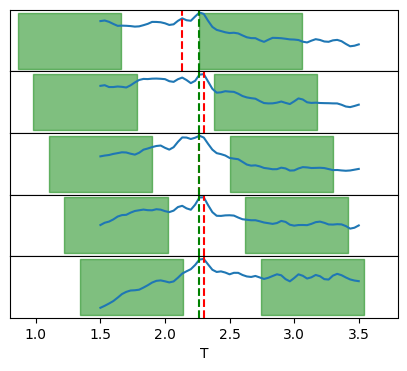

In [213]:
train_region = [(low_low+i, low_hi+i, train_range) for i in np.linspace(0, test_range, n_plots)]

print(train_region)
labels_subset = labels_list_t[::N_t]
print(labels_subset)

print(stds[-1])
std_plot = [stds[0], stds[3], stds[7], stds[11], stds[-1]]
fig, axs = plt.subplots(len(std_plot), 1, figsize=(5, 0.8 * len(std_plot)))
for i, std in enumerate(std_plot):
    std = gaussian_filter(std, 1)
    x_1, x_2, width = train_region[3*i]
    axs[i].fill_betweenx([0, max(std)], x_1-width/2, x_1+width/2, color='green', alpha=0.5)
    print(x_1-width/2)
    axs[i].fill_betweenx([0, max(std)], x_2-width/2, x_2+width/2, color='green', alpha=0.5)
    axs[i].plot(labels_subset, std)
    axs[i].set_xlim(0.8, 3.8)
    axs[i].set_yticks([])

    idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
    max_std = np.max(std[idx_range[0]:idx_range[-1]])
    #print(np.where(std == max_std)[0][0])
    Tc = labels_subset[np.where(std == max_std)[0][0]]
    axs[i].axvline(x=Tc, color='r', linestyle='--')
    axs[i].axvline(x=2.26, color='g', linestyle='--')
    #print(Tc)

axs[i].set_xlabel('T')

plt.subplots_adjust(hspace=0)


In [214]:
def get_confidences(stds = stds, n_plots = n_plots, train_region = train_region):
    deltaW = train_region[1][0]-train_region[0][0]
    Tcs = []
    for i, std in enumerate(stds):
        x_1, x_2, width = train_region[i]
        idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
        max_std = np.max(std[idx_range[0]:idx_range[-1]])
        Tcs.append(labels_subset[np.where(std == max_std)[0][0]])
    n_half = n_plots//2
    j = 0
    confidences = []
    while j+n_half<=n_plots:
        Tcs_now = torch.tensor(Tcs[j:j+n_half].copy())
        std_of_Tcs  = torch.std(Tcs_now, correction = 0)
        confidences.append((1-std_of_Tcs/torch.sqrt(std_of_Tcs**2+deltaW**2), torch.mean(Tcs_now)))
        j += 1
    return confidences

In [215]:
C = get_confidences()
conf = [item[0].numpy() for item in C]
Tc_conf = [item[1].numpy() for item in C]
print(conf, Tc_conf)
print(np.where(conf == np.max(conf))[0])
print(np.max(conf))
print(Tc_conf[np.where(conf == np.max(conf))[0][0]])

[array(0.03264064, dtype=float32), array(0.03299123, dtype=float32), array(0.03245664, dtype=float32), array(0.03245664, dtype=float32), array(0.03245664, dtype=float32), array(0.7343068, dtype=float32), array(0.7343068, dtype=float32), array(0.7343068, dtype=float32), array(0.7343068, dtype=float32)] [array(2.2125, dtype=float32), array(2.2333333, dtype=float32), array(2.2375, dtype=float32), array(2.2375002, dtype=float32), array(2.2375, dtype=float32), array(2.295833, dtype=float32), array(2.295833, dtype=float32), array(2.295833, dtype=float32), array(2.2958333, dtype=float32)]
[5 6 7 8]
0.7343068
2.295833


2.295833
0.7343068


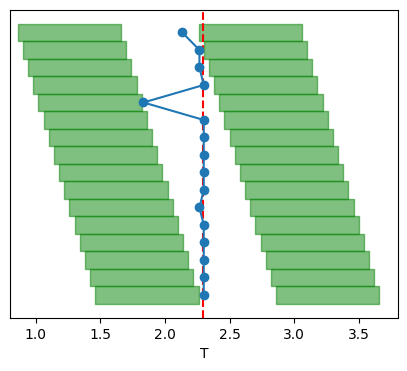

In [216]:
train_region = [(low_low+i, low_hi+i, train_range) for i in np.linspace(0, test_range, n_plots)]

#print(train_region)
labels_subset = labels_list_t[::N_t]
#print(labels_subset)

Tcs = []
fig, axs = plt.subplots(1, 1, figsize=(5,4))
for i, std in enumerate(stds):
    x_1, x_2, width = train_region[i]
    axs.fill_betweenx([0-i, -1-i], x_1-width/2, x_1+width/2, color='green', alpha=0.5)
    #print(x_1-width/2)
    axs.fill_betweenx([0-i, -1-i], x_2-width/2, x_2+width/2, color='green', alpha=0.5)
    #axs[i].plot(labels_subset, std)
    axs.set_xlim(0.8, 3.8)
    axs.set_yticks([])

    idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
    max_std = np.max(std[idx_range[0]:idx_range[-1]])
    #print(np.where(std == max_std)[0][0])
    Tcs.append(labels_subset[np.where(std == max_std)[0][0]])
    #axs.scatter(x=Tc, color='r', linestyle='--')
    #axs[i].axvline(x=2.26, color='g', linestyle='--')
    #print(Tc)

axs.axvline(x=Tc_conf[np.where(conf == np.max(conf))[0][0]], color='r', linestyle='--')
axs.plot(Tcs, -np.arange(len(Tcs))-0.5, marker='o')

print(Tc_conf[np.where(conf == np.max(conf))[0][0]])
print(np.max(conf))

axs.set_xlabel('T')

plt.subplots_adjust(hspace=0)

In [217]:
def get_confidences(stds = stds, n_plots = n_plots, train_region = train_region):
    deltaW = train_region[1][0]-train_region[0][0]
    Tcs = []
    for i, std in enumerate(stds):
        x_1, x_2, width = train_region[i]
        idx_range = np.where((np.array(labels_subset) > x_1+width/2) & (np.array(labels_subset) < x_2-width/2))[0]
        max_std = np.max(std[idx_range[0]:idx_range[-1]])
        Tcs.append(labels_subset[np.where(std == max_std)[0][0]])
    n_half = n_plots//2
    j = 0
    confidences = []
    while j+n_half<=n_plots:
        Tcs_now = torch.tensor(Tcs[j:j+n_half].copy())
        std_of_Tcs  = torch.std(Tcs_now, correction = 0)
        confidences.append((1-std_of_Tcs/torch.sqrt(std_of_Tcs**2+deltaW**2), torch.mean(Tcs_now)))
        j += 1
    return confidences

In [218]:
get_confidences()

[(tensor(0.0326), tensor(2.2125)),
 (tensor(0.0330), tensor(2.2333)),
 (tensor(0.0325), tensor(2.2375)),
 (tensor(0.0325), tensor(2.2375)),
 (tensor(0.0325), tensor(2.2375)),
 (tensor(0.7343), tensor(2.2958)),
 (tensor(0.7343), tensor(2.2958)),
 (tensor(0.7343), tensor(2.2958)),
 (tensor(0.7343), tensor(2.2958))]

In [219]:
# PyTorch models inherit from torch.nn.Module
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            #nn.Dropout(0.3),
            nn.Conv2d(4, 16, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            #nn.Dropout(0.3),
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            #nn.Dropout(0.3),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Flatten(),
            nn.Linear(64*4*4, 512),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(512, 64),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16,2)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x

# PyTorch models inherit from torch.nn.Module
class NN_1(nn.Module):
    def __init__(self):
        super(NN_1, self).__init__()
        self.forward1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(L**2, 16000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16000, 4000),
            nn.ReLU(),
            nn.Linear(4000, 2000),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(2000, 1000),
            nn.ReLU(),
            nn.Linear(1000,200),
            nn.Dropout(0.5),
            nn.Linear(200, 20),
            nn.ReLU(),
            nn.Linear(20,2)
        )

    def forward(self, x):
        x = self.forward1(x)
        return x


In [158]:
torch.manual_seed(42)
x= 2.1
#print(df['Temperature'])
filtered_df = df[((df['Temperature'] > x-1.1) & (df['Temperature'] < x-0.3)) | ((df['Temperature'] > x+0.3) & (df['Temperature'] < x+1.1))]
print(len(filtered_df["Temperature"]))

#X = torch.tensor(filtered_df['Temperature'].values, dtype=torch.float)
#print(len(X))
zeros_tensor = torch.zeros(int(len(df[(df['Temperature'] > x-1.1) & (df['Temperature'] < x-0.3)])))
#print(len(zeros_tensor))
ones_tensor = torch.ones(int(len(df[(df['Temperature'] > x+0.3) & (df['Temperature'] < x+1.1)])))
#print(len(ones_tensor))
X = torch.cat((zeros_tensor, ones_tensor)).unsqueeze(1)
class_indices = X.long()

one_hot = F.one_hot(class_indices, num_classes=2)

y = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in filtered_df['Spins'].values]).unsqueeze(1)

print(one_hot)
print(y)
dataset = TensorDataset(one_hot,y)

X_t = torch.tensor(df_t['Temperature'].values, dtype=torch.float)
y_t = torch.stack([torch.tensor(spin_sequence, dtype=torch.float) for spin_sequence in df_t['Spins'].values]).unsqueeze(1)
dataset_t = TensorDataset(X_t, y_t)

530
tensor([[[1, 0]],

        [[1, 0]],

        [[1, 0]],

        ...,

        [[0, 1]],

        [[0, 1]],

        [[0, 1]]])
tensor([[[[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],

In [114]:
model = CNN_1()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)

#torch.optim.Adam(model.parameters(), lr=0.01)
#optim.SGD(model.parameters(), lr=0.005, momentum=0.9, dampening=0.0, weight_decay=0.0, nesterov=True)
#optim.SGD(model.parameters(), lr=0.006, momentum=0.9, dampening=0.0, weight_decay=0, nesterov=False)
#epoch 100
#summary(model, input_size=(1, L, L))

train_ratio = 0.8 # 80% for training, 20% for testing

# Calculate the number of samples for training and testing
num_samples = len(dataset)
num_train = int(train_ratio * num_samples)
num_test = num_samples - num_train

print(num_train, num_test)

# Split the dataset
torch.manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [num_train, num_test])

#print(train_dataset[5])
batch_size = 8 # Example batch size
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
#print(trainloader[0][1].shape)
for batch_idx, (temperatures, spin_configs) in enumerate(trainloader):
    print(f"Batch {batch_idx}:")
    print(f"Temperatures shape: {temperatures.shape}")
    print(f"Spin Configurations shape: {spin_configs.shape}")
    break

424 106
Batch 0:
Temperatures shape: torch.Size([8, 1, 2])
Spin Configurations shape: torch.Size([8, 1, 64, 64])


tensor([[ 0.0352, -0.0283],
        [ 0.0345, -0.0284],
        [ 0.0340, -0.0287],
        [ 0.0341, -0.0286],
        [ 0.0349, -0.0277],
        [ 0.0355, -0.0281],
        [ 0.0360, -0.0282],
        [ 0.0340, -0.0290]], grad_fn=<AddmmBackward0>)
tensor([[[0, 1]],

        [[0, 1]],

        [[1, 0]],

        [[1, 0]],

        [[0, 1]],

        [[1, 0]],

        [[1, 0]],

        [[1, 0]]])


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

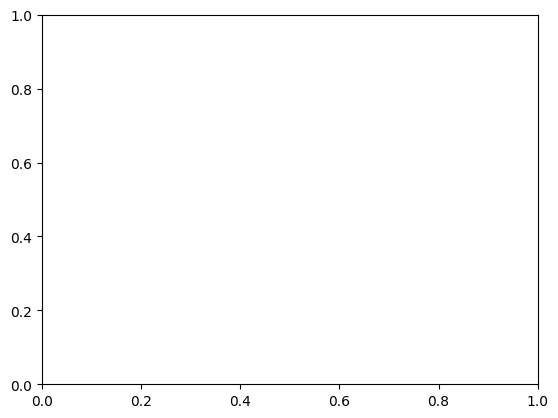

In [115]:
#torch.manual_seed(42)
n_epochs = 10

y_pred_list = []
labels_list = []

fig, ax = plt.subplots()
#ax.plot(np.linspace(0,7,1001),np.linspace(0,7,1001))
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),n_epochs))
#print(n_epochs//10)

for epoch in range(n_epochs):
    for labels, inputs in trainloader:
        # forward, backward, and then weight update
        #print(inputs.shape)
        #print(labels.shape)
        y_pred = model(inputs)
        print(y_pred)
        print(labels)
        loss = loss_fn(y_pred, labels)
        #print(loss)
        print(torch.mean((y_pred.squeeze() - labels)**2))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #if epoch%1 == 0:
    #print(epoch)
    mse = 0
    count = 0
    for labels, inputs in testloader:
        y_pred = model(inputs)
        mse += torch.mean((y_pred - labels)**2)
        count += len(labels)
        y_pred_list.extend(y_pred.squeeze().tolist()) # Convert to list and add to y_pred_list
        labels_list.extend(labels.tolist()) # Convert to list and add to labels_list

    mse /= count
    print("Epoch %d: Cross entropy loss %.10f" % (epoch, mse))

    ax.scatter(labels_list, y_pred_list, alpha = epoch/n_epochs, c=str(colors[int(epoch)]))
    ax.set_xlabel('True values')
    ax.set_ylabel('pred')
    y_pred_list.clear()
    labels_list.clear()
